<a href="https://colab.research.google.com/github/harnalashok/Clustering/blob/master/iris_simple_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Last amended: 18th Sep, 2022
# Objective: 
#           i) To show basics of clustering
#          ii) To use sklearn classes

### Call libraries

In [ ]:
# 1.0 Call libraries

import pandas as pd
import numpy as np

# 1.0.1 For plotting
import matplotlib.pyplot as plt

# 1.0.2 Class for clustering
from sklearn.cluster import KMeans

# 1.0.3 Get dataset
from sklearn import datasets


In [ ]:
# 1.1 Display output of multiple commands
#     from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### KMeans in pictures

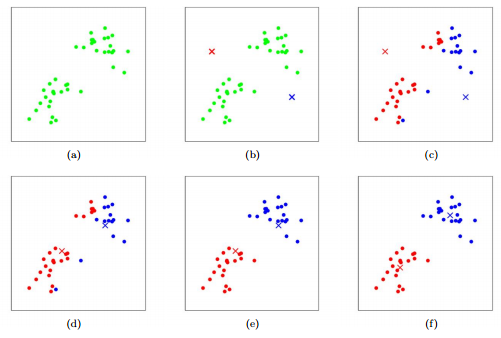

### Get data

In [ ]:
# 2.0 Load iris dataset
#      from sklearn 'datasets'

iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [ ]:
# 2.1 How to show keys and values in a dictionary:
f = {'a': 20, 'b': 89}
f.keys()
print("")
f.values()

dict_keys(['a', 'b'])

dict_values([20, 89])

In [ ]:
# 2.1 Keys in the 'iris' bunch:

iris.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module'])

In [ ]:
# 2.2 So get our observations
#      and target. As also
#       feature names

X = iris['data']
y = iris['target']
features = iris['feature_names']


In [ ]:
# 2.3 Show few values
#     Our dataset is(150,4)
X[:4]
print("\n ")
y[:4]
print("\n ")
features
print("\n")
X.shape


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2]])

array([0, 0, 0, 0])

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

(150, 4)

#### Shuffle data

In [ ]:
# 2.4 Shuffle sequential data, t
t = np.arange(len(X))   # Length of 't' is same as no of rows in our data

# 2.4.1 Inplace shuffle of 't'
np.random.shuffle(t)
t

array([ 39, 100, 109, 139,   8,  52,  96, 130,  99,  78,  74,  97, 142,
       115,  82, 134,  37, 145,  63,  79, 112,  17,  66, 149,  41,  21,
       126, 110,   3, 107,  18,  32, 122, 119,  50,  16,  80,   9,  83,
         0,  93, 124, 132,  92,  72, 116,  59,  46, 129,  90,  31, 121,
        89,  27, 104,  45, 106,  12,  43,  56,   2, 108,  58,  38,  61,
        48, 147, 136,  86, 143,  77,  34,  19,  57, 113, 101,  51, 111,
        71,  73, 148, 120, 141,  42,  76,  22, 102,  49, 117,  94,  35,
       127, 128,  47,  85,  62,  70,  44, 140,  33,  65,  53,  87,   6,
        13,  68,  23,  10, 137,   7,  29, 118, 138,   1,  84,  24,  54,
        11,   4,  95, 123,  30,  25, 144, 125,  28,  75, 135,  60, 114,
        20, 146, 105,  91,  88,  98, 133, 131,  40,  55,  67,  81,  36,
        14,  26,   5,  15,  69, 103,  64])

In [ ]:
# 2.5 Shuffle X and y now:

X = X[t,:]
y = y[t]

### Cluster dataset: X

#### Instantiate KMeans Class

In [ ]:
# 3.0 Instantiate KMeans class
#      with default values of parameters:
#      We fix number of clusters as: 3

kmeans = KMeans(n_clusters = 3)    

#### Train the kmeans object over data

In [ ]:
# 3.1 Let the class learn our data:

kmeans.fit(X)

KMeans(n_clusters=3)

#### Get cluster centers

In [ ]:
# 3.1 Learning complete.
#     Get cluster centers (centroids) now:

kmeans.cluster_centers_

array([[5.006     , 3.428     , 1.462     , 0.246     ],
       [5.9016129 , 2.7483871 , 4.39354839, 1.43387097],
       [6.85      , 3.07368421, 5.74210526, 2.07105263]])

#### Get cluster labels

In [ ]:
# 3.2 Which observation falls in which cluster?

kmeans.labels_

array([0, 2, 2, 2, 0, 2, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 0, 2, 1, 1, 2, 0,
       1, 1, 0, 0, 1, 2, 0, 2, 0, 0, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 2, 1,
       1, 2, 1, 0, 2, 1, 0, 1, 1, 0, 2, 0, 1, 0, 0, 1, 0, 2, 1, 0, 1, 0,
       2, 2, 1, 2, 2, 0, 0, 1, 1, 1, 1, 2, 1, 1, 2, 2, 2, 0, 1, 0, 2, 0,
       2, 1, 0, 1, 2, 0, 1, 1, 1, 0, 2, 0, 1, 1, 1, 0, 0, 1, 0, 0, 2, 0,
       0, 2, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 2, 2, 0, 1, 2, 1, 1, 0, 1,
       2, 1, 1, 1, 1, 2, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 2, 1], dtype=int32)

### SSE

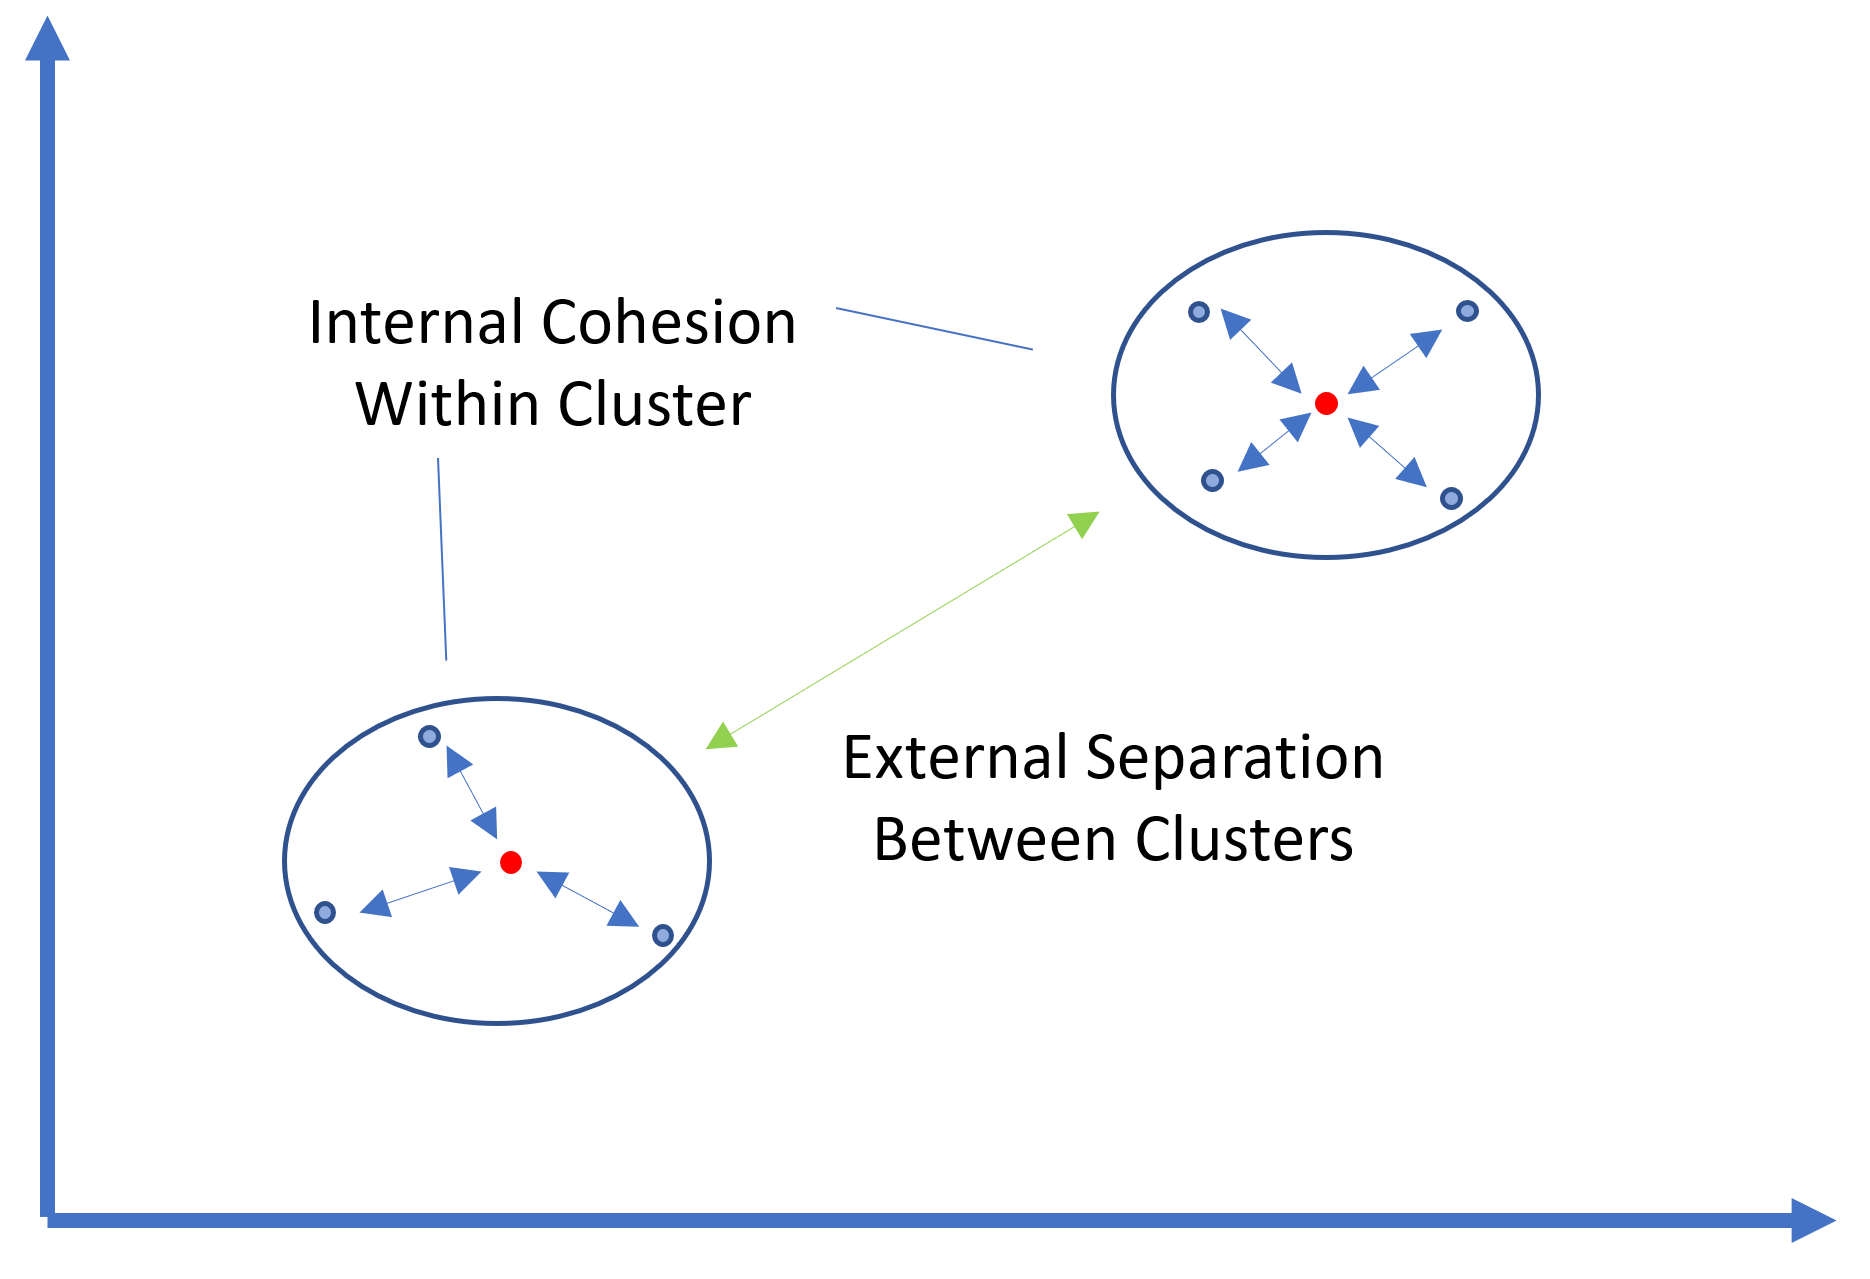

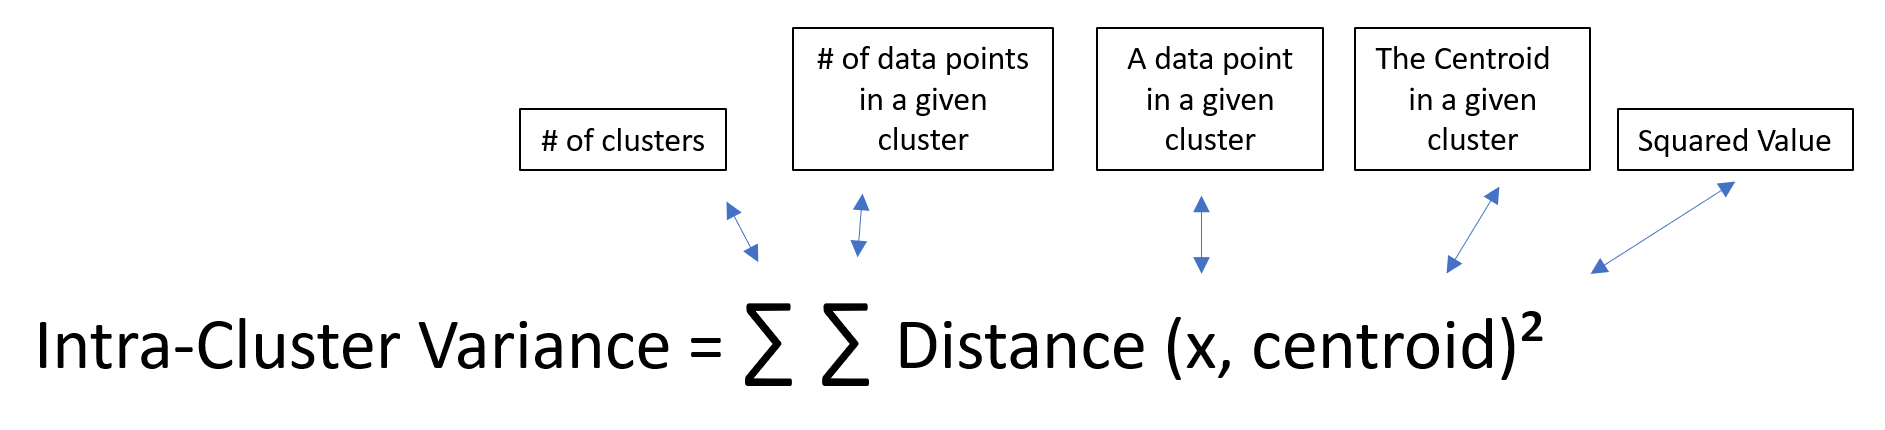

In [ ]:
# 3.3 SSE or Intra-cluster variance

kmeans.inertia_

78.851441426146

### Display clusters in a plot

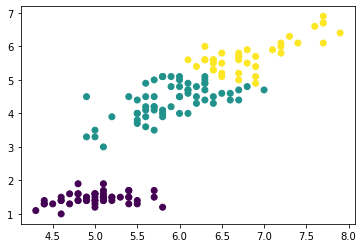

In [ ]:
# 4.0 Plot data points colored by cluster labels

plt.scatter(
            X[:,0],X[:,2],       # Data point
            c = kmeans.labels_   # each data point colored by cluster label
            );

### Scree plot

In [ ]:
# 5.0 Initialize an empty list :
sse = []

# 5.1 Vary number of clusters
#     For no of clusters as: i
for i in range(1, 11):
  # 5.1.1 Initialise KMeans   
  kmeans = KMeans(
                  n_clusters = i,
                  max_iter = 300)
  # 5.1.2 'train' the instantiated object
  kmeans.fit(X)
  # 5.1.3 Calculate inertia and append it
  #       to sse
  sse.append(kmeans.inertia_)    

KMeans(n_clusters=1)

KMeans(n_clusters=2)

KMeans(n_clusters=3)

KMeans(n_clusters=4)

KMeans(n_clusters=5)

KMeans(n_clusters=6)

KMeans(n_clusters=7)

KMeans()

KMeans(n_clusters=9)

KMeans(n_clusters=10)

In [ ]:
# 5.2 Here is our list of values in sse:
sse

[681.3705999999999,
 152.3479517603579,
 78.851441426146,
 57.2284732142857,
 46.44618205128205,
 39.066035353535355,
 34.73594213139802,
 29.98894395078605,
 27.93975279106857,
 26.098014459224984]

Text(0.5, 1.0, 'The elbow method')

Text(0.5, 0, 'Number of clusters')

Text(0, 0.5, 'SSE')

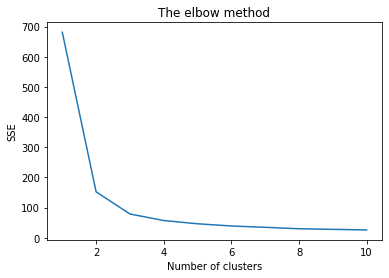

In [ ]:
# 5.3 Plot the results onto a line graph:
#     We have 10 points:

plt.plot(range(1, 11), sse)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE') # Sum of squared errors
plt.show()

### KMeans is not free lunch

Case1: Clusters are not convex or closed

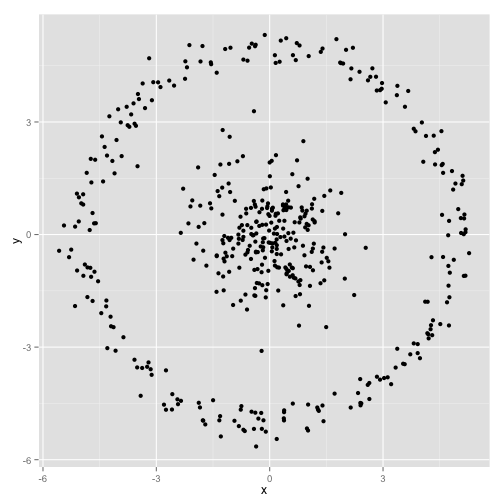

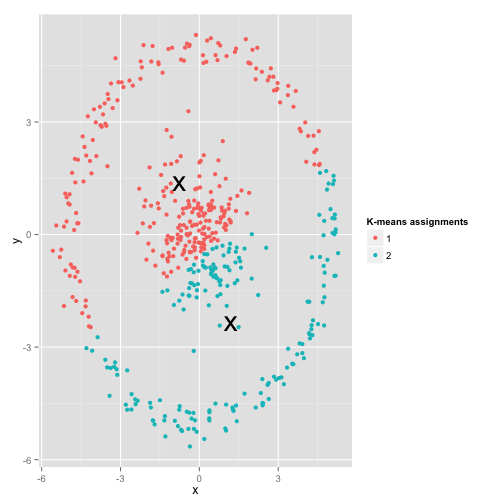

#### Case2: Unevenly sized clsuters

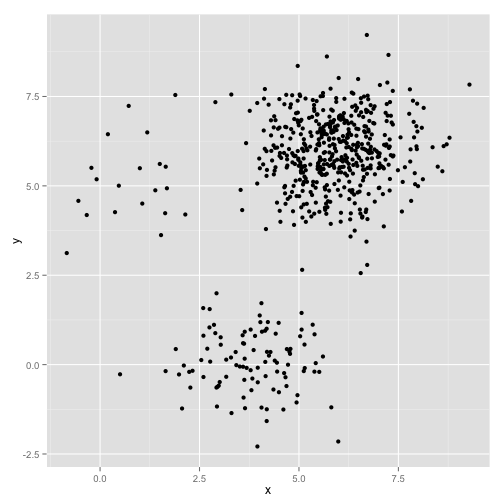

### Silhouette score
See [here](https://github.com/harnalashok/Clustering/blob/master/Silhoutte%20score%20calculation.pdf) as to how to calculate Silhouette score.

In [ ]:
from sklearn.metrics import silhouette_score

silhouettes = []
kmin = 2
kmax = 10
for k in range(kmin, kmax+1):
  # We fit the KMeans algo with k clusters    
  kmeans = KMeans(n_clusters = k).fit(X)
  labels = kmeans.labels_
  # We calculate the silhouette score and append it to the silhouette list
  silhouettes.append(silhouette_score(X, labels, metric = 'euclidean'))



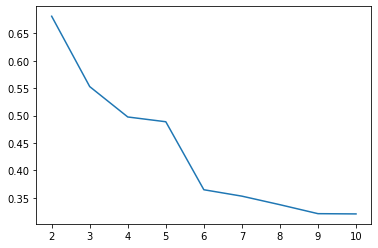

In [ ]:
plt.plot(range(kmin,kmax+1),silhouettes) ;
plt.show() ;

See [this link to fully understand](https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html) Silhoutte Images:




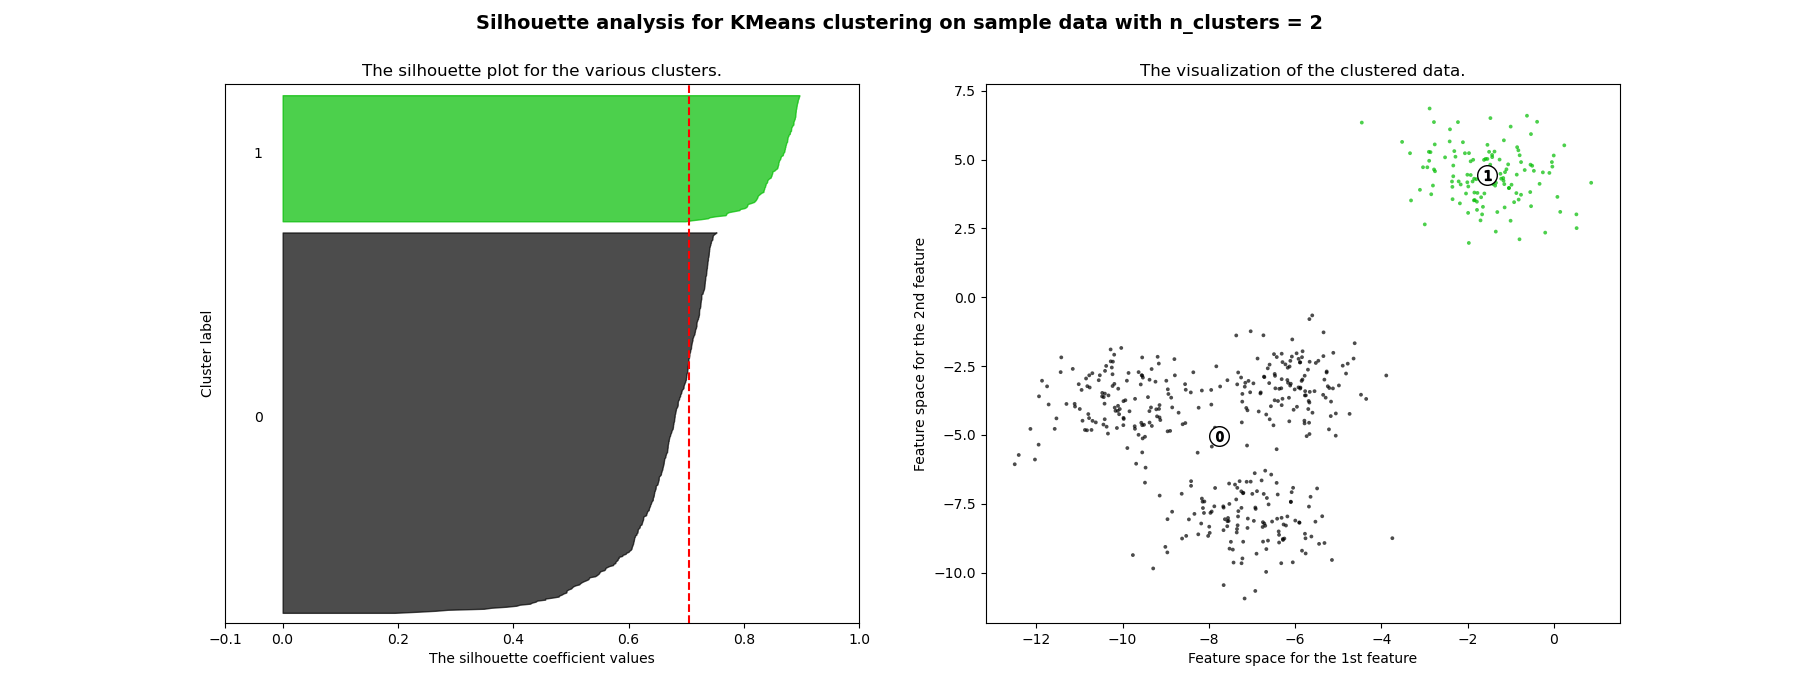

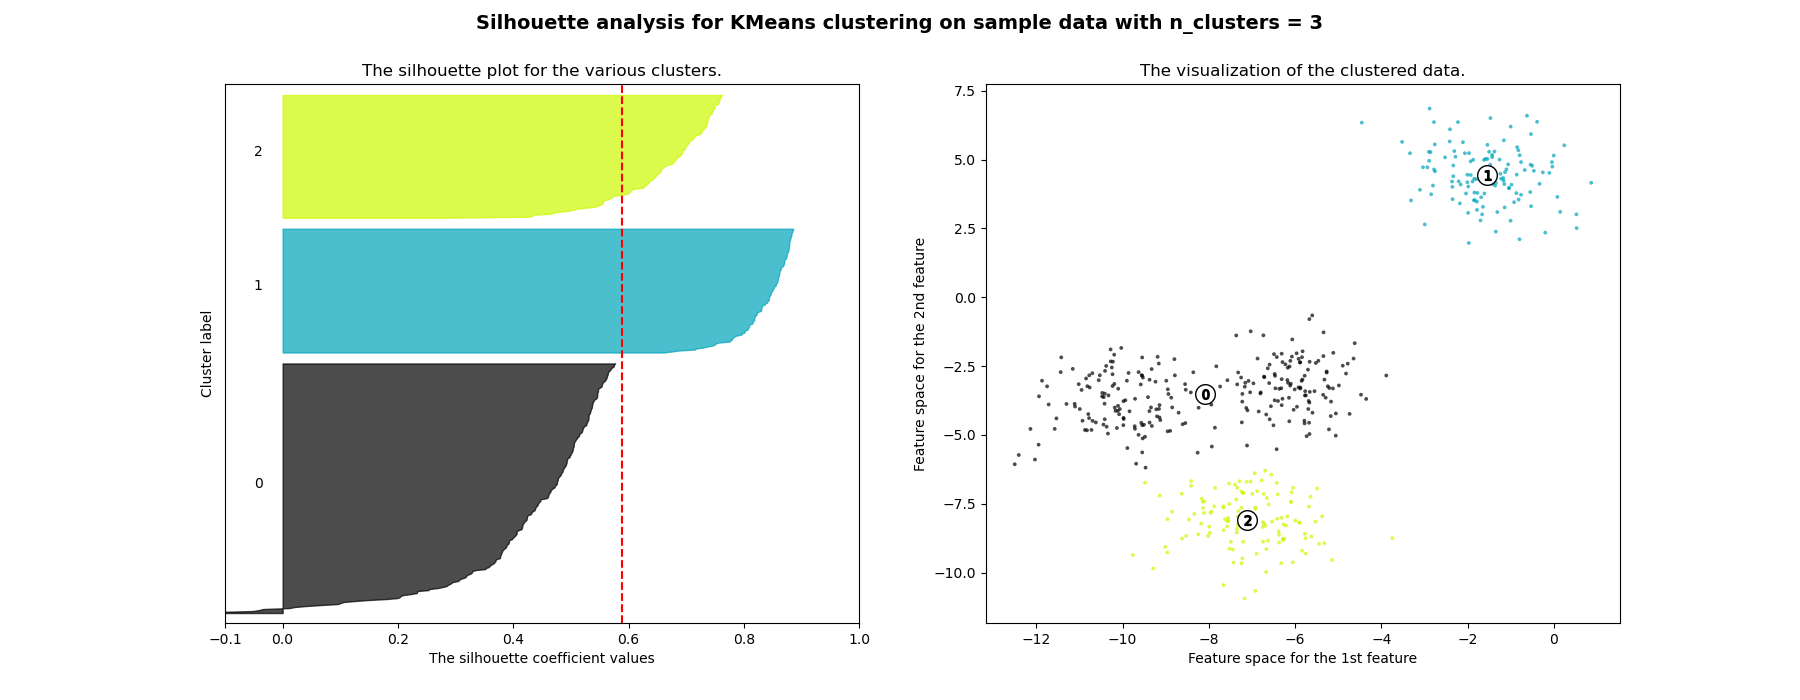

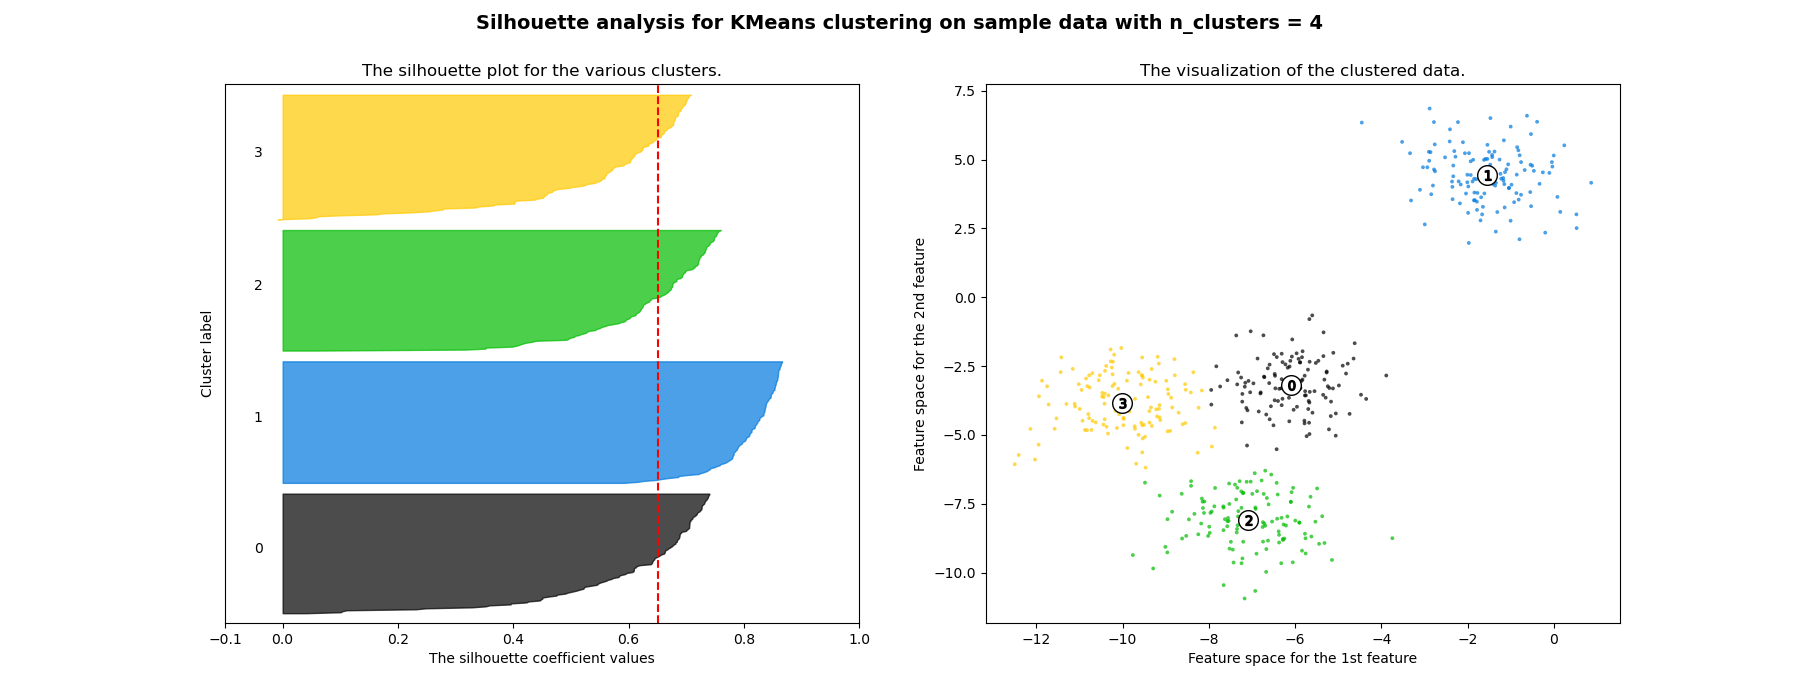

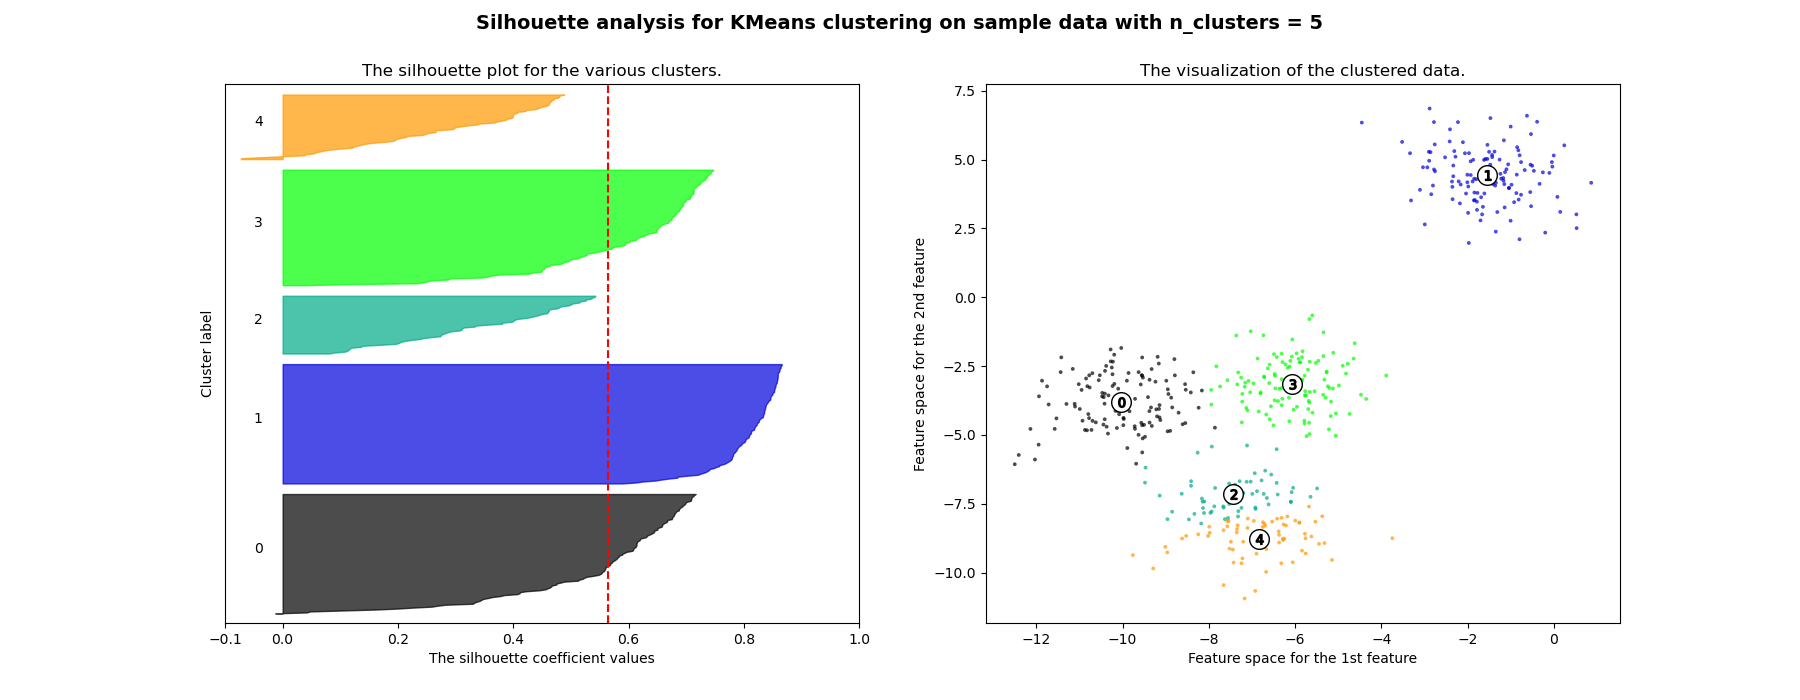







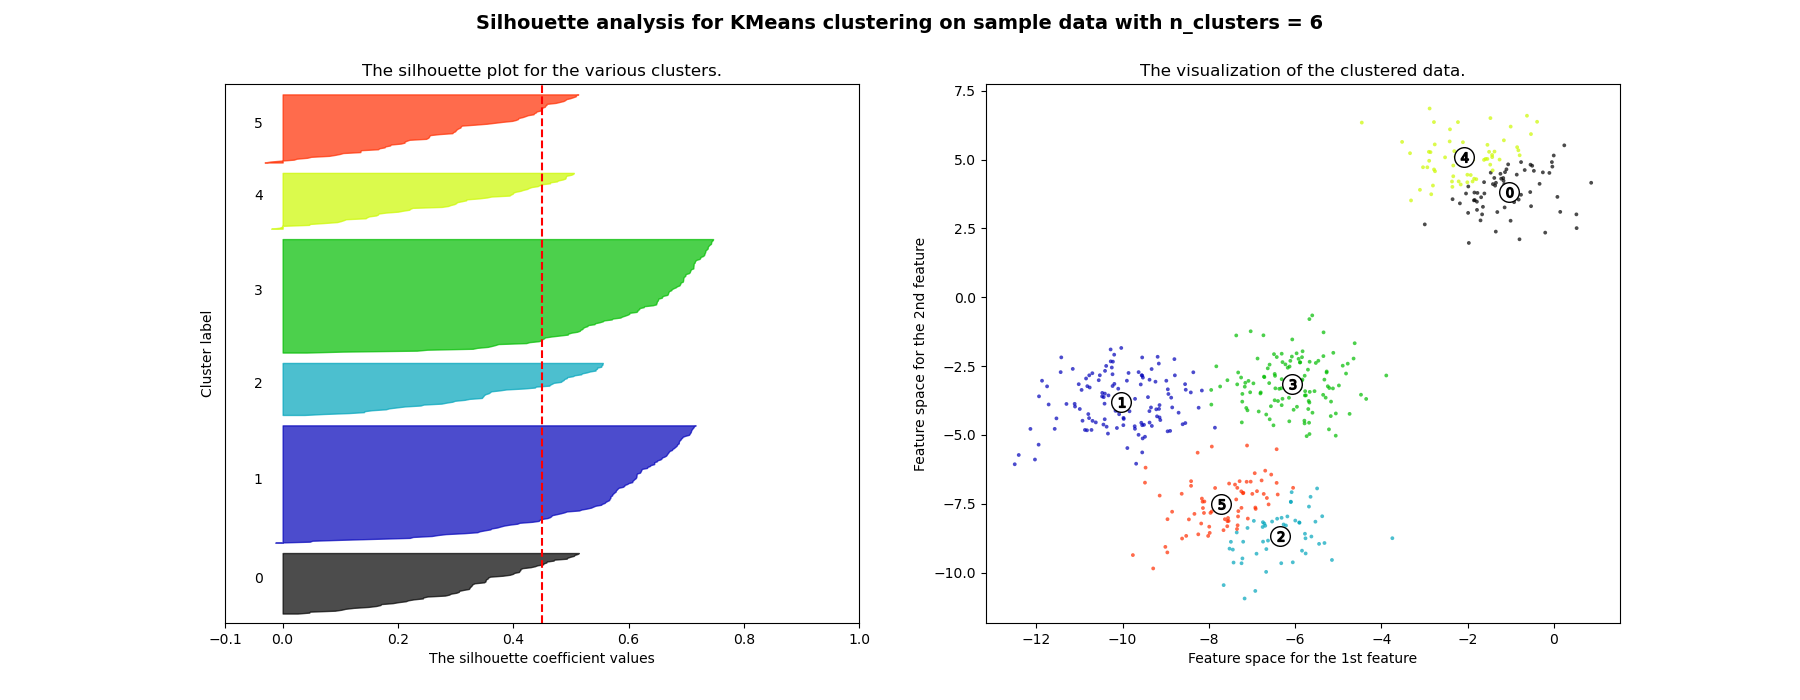

In [ ]:
########### I am Done ############